In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
!pip install zignor
import zignor
import timeit
import math
import random
sns.set_style("darkgrid")

  Created wheel for zignor: filename=zignor-0.1.8-cp36-cp36m-linux_x86_64.whl size=32741 sha256=36ba9c040323dd756ddb36be87eddc10a2922d1e35cea65606a486e0535ef391
  Stored in directory: /root/.cache/pip/wheels/ef/af/02/1817c1c63c19e8e9854061f7cedfc590e5c0d5a6b951b67a13
Successfully built zignor


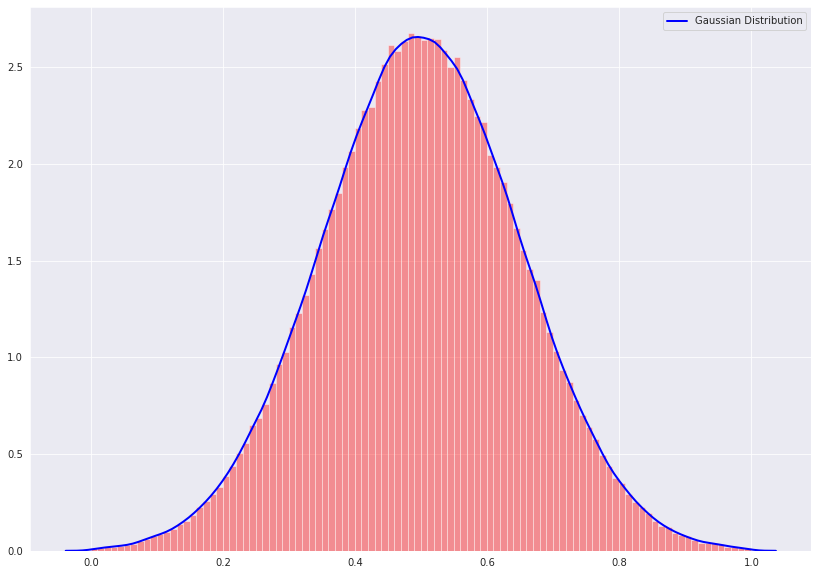

In [ ]:
def get_truncated_normal(mean=0, sd=1, low=0, upp=1):
    return ss.truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

def BuildGaussian(mean=0.5, sd=0.15, low=0, upp=1, number=300000):
  X = get_truncated_normal(mean, sd, low, upp)

  plt.figure(figsize=(14,10))
  sns.distplot(X.rvs(number), bins=100, color='red',
               kde_kws={"color": "b", "lw": 2, "label": 'Gaussian Distribution'})

BuildGaussian()

In [ ]:
def BuildUniform(lower=10, upper=20, number=1000000):
  data_uniform = ss.uniform.rvs(size=number, loc = lower, scale=upper-lower)

  plt.figure(figsize=(14,10))
  sns.distplot(data_uniform, bins=100, color='red', norm_hist=False,
               kde_kws={"color": "b", "lw": 2, "label": 'Uniform Distribution'})
  
BuildUniform(lower=int(input()), upper=int(input()))

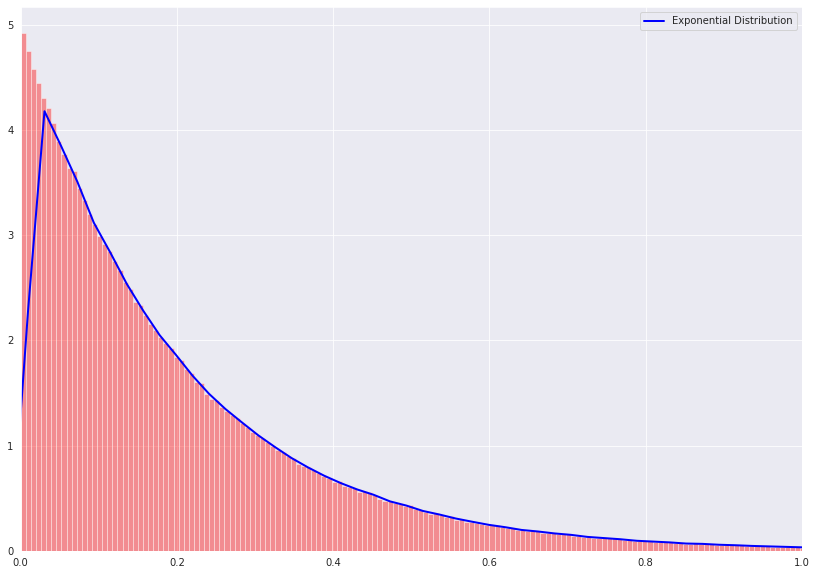

In [ ]:
def BuildExponential(scale=0.0001, loc=0.2, number=1000000):
  data_expon = ss.expon.rvs(scale,loc,number)

  plt.figure(figsize=(14,10))
  plt.xlim(0, 1)
  sns.distplot(data_expon, bins=400, color='red', norm_hist=False,
               kde_kws={"color": "b", "lw": 2, "label": 'Exponential Distribution'})
  
BuildExponential()

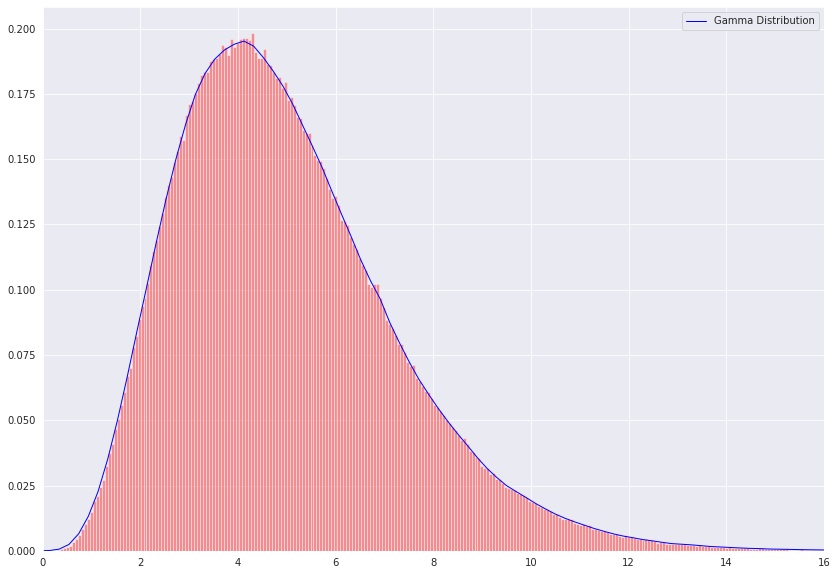

In [ ]:
def BuildGamma():
  data_gamma = ss.gamma.rvs(a=5, size=1000000)

  plt.figure(figsize=(14,10))
  plt.xlim(0, 16)
  sns.distplot(data_gamma, bins=400, color='red', norm_hist=False,
               kde_kws={"color": "b", "lw": 1, "label": 'Gamma Distribution'})

BuildGamma()


In [ ]:
numbers = 50000000  # 50 миллионов

start = timeit.default_timer()
norm1 = zignor.randn(numbers)
stop = timeit.default_timer()

start1 = timeit.default_timer()
u1 = np.random.random(numbers)
u2 = np.random.random(numbers)
z1 = np.sqrt(-2.0*np.log(u1)) * np.cos(2*np.pi*u2)
z2 = np.sqrt(-2.0*np.log(u1)) * np.sin(2*np.pi*u2)
stop1 = timeit.default_timer()



print('Execution time of ziggurat algorithm: {}'.format(stop - start ))
print('Execution time of box-muller algorithm: {}'.format(stop1 - start1 ))

Execution time of ziggurat algorithm: 0.34780644400007077
Execution time of box-muller algorithm: 8.151371169999948


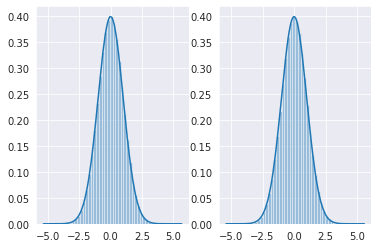

In [ ]:
f, axes = plt.subplots(1, 2)
sns.distplot(norm1, ax=axes[0])
sns.distplot(z2, ax=axes[1])

F_onewayResult(statistic=0.14348462664714492, pvalue=0.714696363726441)